In [1]:
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup as soup

%matplotlib inline  
plt.rcParams['figure.figsize'] = 8,4

In [2]:
#Data is in format 0-0, so I'll need to write a function to split this into wins and losses separately
def winloss(A):
    try:
        hyphenLoc = A.index('–')
        wins = A[:hyphenLoc]
        losses = A[hyphenLoc+1:]
    except:
        hyphenLoc = A.index('-')
        wins = A[:hyphenLoc]
        losses = A[hyphenLoc+1:]
    return [int(wins), int(losses)]

In [71]:
Recruit2020 = pd.read_csv('BigTwelve2020.csv')
Recruit2019 = pd.read_csv('BigTwelve2019.csv')
Recruit2018 = pd.read_csv('BigTwelve2018.csv')
Recruit2017 = pd.read_csv('BigTwelve2017.csv')
Recruit2016 = pd.read_csv('BigTwelve2016.csv')
Recruit2015 = pd.read_csv('BigTwelve2015.csv')
Recruit2014 = pd.read_csv('BigTwelve2014.csv')
Recruit2013 = pd.read_csv('BigTwelve2013.csv')
Recruit2012 = pd.read_csv('BigTwelve2012.csv')
Recruit2011 = pd.read_csv('BigTwelve2011.csv')
Recruit2010 = pd.read_csv('BigTwelve2020.csv')
Recruit2009 = pd.read_csv('BigTwelve2009.csv')
BigTwelveTeamWins = pd.read_csv('BigTwelveTeamWins.csv')

In [72]:
Recruit2020.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2020.set_index('School', inplace = True)

Recruit2019.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2019.set_index('School', inplace = True)

Recruit2018.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2018.set_index('School', inplace = True)

Recruit2017.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2017.set_index('School', inplace = True)

Recruit2016.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2016.set_index('School', inplace = True)

Recruit2015.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2015.set_index('School', inplace = True)

Recruit2014.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2014.set_index('School', inplace = True)

Recruit2013.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2013.set_index('School', inplace = True)

Recruit2012.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2012.set_index('School', inplace = True)

Recruit2011.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2011.set_index('School', inplace = True)

Recruit2010.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2010.set_index('School', inplace = True)

Recruit2009.drop('Unnamed: 0', axis=1, inplace = True)
Recruit2009.set_index('School', inplace = True)
#test.index
#if letter in "AEIOUaeiou":

In [73]:
#Recruit2017.drop('Unnamed: 0', axis=1, inplace = True)
#Recruit2017.set_index('School', inplace = True)
Recruit2019.head()

,Rank,Number of Commits,Average Recruit Ranking,Total Recruit Points
School,,,,
Texas,1,26 Commits,91.19,287.69
Oklahoma,2,24 Commits,91.20,279.28
TCU,3,27 Commits,86.53,217.48
Baylor,4,24 Commits,85.95,202.87
Oklahoma State,5,21 Commits,86.01,202.09


In [69]:
teamdict = {"OKST":"Oklahoma State", "WVU": "West Virginia", "TTU": 'Texas Tech', 'KST': 'Kansas State', 'KAN': 'Kansas', 
           'TEX':'Texas', 'BAY':'Baylor', 'TCU':'TCU', 'OKLA':'Oklahoma', 'IST':'Iowa State'}
teamdictBack = {"Oklahoma State":"OKST", "West Virginia":"WVU", "Texas Tech":"TTU", "Kansas State":"KST", "Kansas":"KAN",
               "Texas":"TEX", "Baylor":"BAY", "TCU":"TCU", "Oklahoma":"OKLA", "Iowa State":"IST"}

def AddWins(Yeardf, Winsdf, Year, Concat):
    empt = []
    try:
        Yeardf.drop("Missouri", inplace = True)
        Yeardf.drop("Texas A&amp;M", inplace = True)
    except:
        empt = empt
    for ind in Yeardf.index:
        col = teamdictBack[ind]
        thing = Winsdf.loc[Year, col]
        empt.append(thing)
    emptSer = pd.Series(empt, index = Yeardf.index, name = 'Wins')
    if Concat:
        emptdf = pd.concat([Yeardf, emptSer], axis=1)
    return emptdf

In [134]:
thing = AddWins(Recruit2009, BigTwelveTeamWins, 2009, True)
thing.head()
#Recruit2009.drop('Unnamed: 0', axis=1, inplace = True)
#Recruit2009.set_index('School', inplace = True)
#Recruit2009.tail(12)

,Rank,Number of Commits,Average Recruit Ranking,Total Recruit Points,Wins
School,,,,,
Texas,1,20 Commits,92.13,277.12,13
Oklahoma,2,22 Commits,89.60,262.78,8
West Virginia,3,26 Commits,86.43,225.23,9
Oklahoma State,5,24 Commits,85.33,209.57,9
Texas Tech,7,24 Commits,85.60,206.43,9


In [136]:
#BigTwelveTeamWins.set_index('Unnamed: 0', inplace = True)
RecruitWins2019df = AddWins(Recruit2019, BigTwelveTeamWins, 2019, True)
RecruitWins2018df = AddWins(Recruit2018, BigTwelveTeamWins, 2018, True)
RecruitWins2017df = AddWins(Recruit2017, BigTwelveTeamWins, 2017, True)
RecruitWins2016df = AddWins(Recruit2016, BigTwelveTeamWins, 2016, True)
RecruitWins2015df = AddWins(Recruit2015, BigTwelveTeamWins, 2015, True)
RecruitWins2014df = AddWins(Recruit2014, BigTwelveTeamWins, 2014, True)
RecruitWins2013df = AddWins(Recruit2013, BigTwelveTeamWins, 2013, True)
RecruitWins2012df = AddWins(Recruit2012, BigTwelveTeamWins, 2012, True)
RecruitWins2011df = AddWins(Recruit2011, BigTwelveTeamWins, 2011, True)
RecruitWins2010df = AddWins(Recruit2010, BigTwelveTeamWins, 2010, True)
RecruitWins2009df = AddWins(Recruit2009, BigTwelveTeamWins, 2009, True)
RecruitWins2019df.head()

,Rank,Number of Commits,Average Recruit Ranking,Total Recruit Points,Wins
School,,,,,
Texas,1,26 Commits,91.19,287.69,8
Oklahoma,2,24 Commits,91.20,279.28,12
TCU,3,27 Commits,86.53,217.48,5
Baylor,4,24 Commits,85.95,202.87,11
Oklahoma State,5,21 Commits,86.01,202.09,8


In [140]:
RecruitYearsdf = {2019:RecruitWins2019df, 2018:RecruitWins2018df, 2017:RecruitWins2017df, 2016:RecruitWins2016df,
                 2015:RecruitWins2015df, 2014:RecruitWins2014df, 2013:RecruitWins2013df, 2012:RecruitWins2012df, 
                 2011:RecruitWins2011df, 2010:RecruitWins2010df, 2009:RecruitWins2009df}

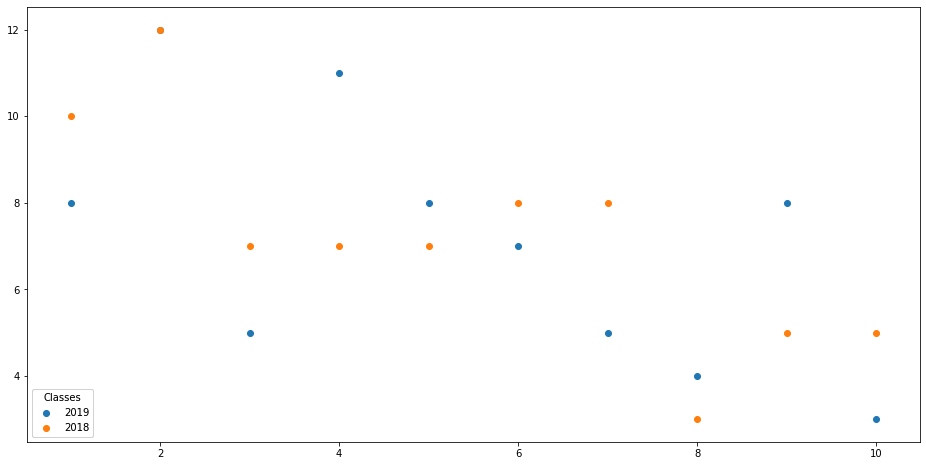

In [87]:
plt.rcParams['figure.figsize'] = 16,8
fig, ax = plt.subplots()
plt.scatter(RecruitWins2019df.Rank, RecruitWins2019df.Wins)
plt.scatter(RecruitWins2018df.Rank, RecruitWins2018df.Wins)
#plt.scatter(RecruitWins2017df.Rank, RecruitWins2017df.Wins)
#plt.scatter(RecruitWins2016df.Rank, RecruitWins2016df.Wins)
#plt.scatter(RecruitWins2015df.Rank, RecruitWins2015df.Wins)
#plt.scatter(RecruitWins2014df.Rank, RecruitWins2014df.Wins)
#plt.scatter(RecruitWins2013df.Rank, RecruitWins2013df.Wins)
#plt.scatter(RecruitWins2012df.Rank, RecruitWins2012df.Wins)
#plt.scatter(RecruitWins2011df.Rank, RecruitWins2011df.Wins)
#plt.scatter(RecruitWins2010df.Rank, RecruitWins2010df.Wins)
#plt.scatter(RecruitWins2009df.Rank, RecruitWins2009df.Wins)
legend1 = ax.legend(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009'],
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [120]:
list1 = 0
new_index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list1 = pd.Series([0,0,0,0,0,0,0,0,0,0], index=new_index)
list2 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], index=new_index)
for key in RecruitYearsdf.keys():
    df = RecruitYearsdf[key]
    df.index =new_index
    #list1 = list1 + df.Wins
    #list3 = df['Wins'].tolist()
    #list1 = list1 + list3
    list1 = list1.add(df.Wins, axis='index')
CumRankWinsdf = pd.DataFrame(data = {"Conference Recruiting Ranking":list2, "Cumulative Wins":list1})
CumRankWinsdf.head(12)

,Conference Recruiting Ranking,Cumulative Wins
1,1,94
2,2,107
3,3,93
4,4,95
5,5,88
6,6,72
7,7,91
8,8,62
9,9,66
10,10,45


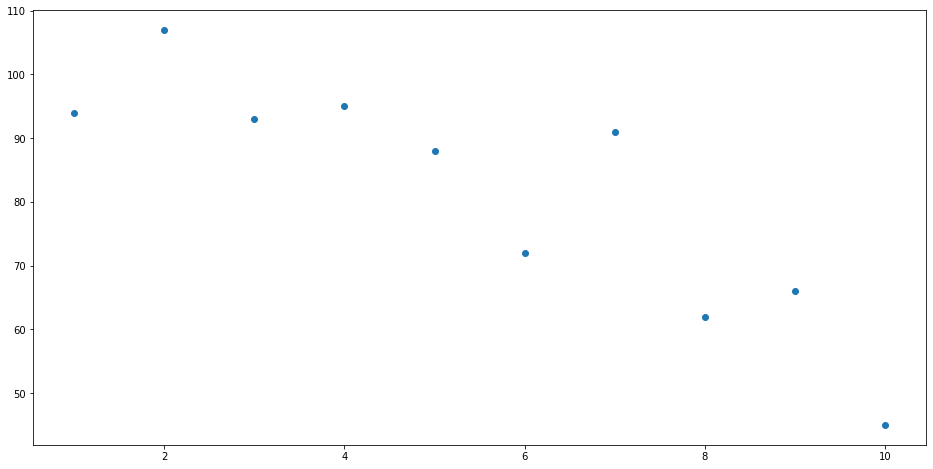

In [121]:
plt.scatter(CumRankWinsdf['Conference Recruiting Ranking'], CumRankWinsdf['Cumulative Wins'])

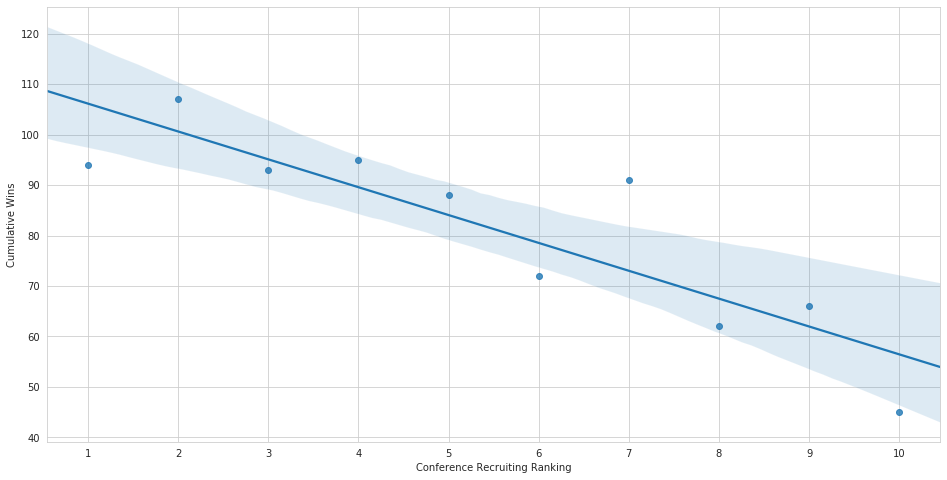

In [143]:
import seaborn as sb
with sb.axes_style("whitegrid"):
    sb.regplot(CumRankWinsdf['Conference Recruiting Ranking'], CumRankWinsdf['Cumulative Wins'])
#locs, labels = plt.xticks()  # Get the current locations and labels.
#print(locs, labels)
plt.xticks(np.arange(1, 11, step=1))  # Set label locations.
#xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
#xticks([0, 1, 2], ['January', 'February', 'March'], rotation=20)  # Set text labels and properties.
#xticks([])  # Disable xticks.
plt.savefig('BigTwelveRecruitingVersusWinsGraph.png')

In [142]:
Tex1 = 0
Tex2 = 0
Ok1 = 0
Ok2 = 0
for key in RecruitYearsdf.keys():
    if RecruitYearsdf[key].loc['Texas', 'Rank'] == 1:
        Tex1+=1
    if RecruitYearsdf[key].loc['Texas', 'Rank'] == 2:
        Tex2+=1
    if RecruitYearsdf[key].loc['Oklahoma', 'Rank'] == 1:
        Ok1+=1
    if RecruitYearsdf[key].loc['Oklahoma', 'Rank'] == 2:
        Ok2+=1
    #list1 = list1 + df.Wins
    #list3 = df['Wins'].tolist()
    #list1 = list1 + list3
print(Tex1, Tex2, Ok1, Ok2)

8 3 3 8


In [141]:
RecruitYearsdf[2019].head()

,Rank,Number of Commits,Average Recruit Ranking,Total Recruit Points,Wins
School,,,,,
Texas,1,26 Commits,91.19,287.69,8
Oklahoma,2,24 Commits,91.20,279.28,12
TCU,3,27 Commits,86.53,217.48,5
Baylor,4,24 Commits,85.95,202.87,11
Oklahoma State,5,21 Commits,86.01,202.09,8
